In [314]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
df = pd.read_csv('Dataset .csv')

In [316]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [317]:
df.shape

(9551, 21)

In [318]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Task_1: Restaurant Reviews
### Analyze the text reviews to identify the most common positive and negative keywords.

In [10]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
positive_data = df.loc[df['Aggregate rating']>= 2.5]

In [9]:
print(positive_data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [30]:
positive_words = positive_data['Rating text'].unique()
print(positive_words)

['Excellent' 'Very Good' 'Good' 'Average']


In [32]:
df['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

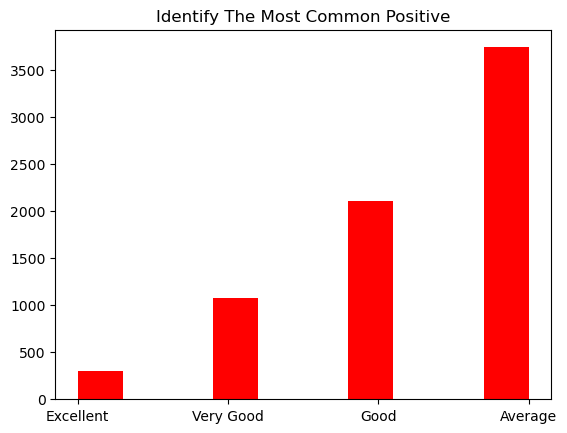

In [29]:
plt.hist(positive_data['Rating text'], color = 'red')
plt.title('Identify The Most Common Positive')
plt.show()

In [23]:
negative_data = df.loc[(df['Aggregate rating']< 2.5) & (df['Aggregate rating']> 0)]
print(negative_data)

      Restaurant ID                  Restaurant Name  Country Code  \
312        17374978                     Troll Tavern           216   
344        17482142              Triangle Restaurant           216   
348        16613059                       Poets Cafe            14   
613         5600961                        Pizza Hut           214   
890          311051                              KFC             1   
...             ...                              ...           ...   
9104           2979                          Chopaal             1   
9105           3237                    Club Ice Cube             1   
9106           2025  Moti Mahal Delux Tandoori Trail             1   
9306        7001208     De Fontein Belgian Beer Cafe           148   
9498        5800634          Elite Indian Restaurant           191   

             City                                            Address  \
312   Gainesville              8590 N Main St Ste B, Helen, GA 30545   
344     Mc Mill

In [25]:
negative_words = negative_data['Rating text'].unique()
print(negative_words)

['Poor']


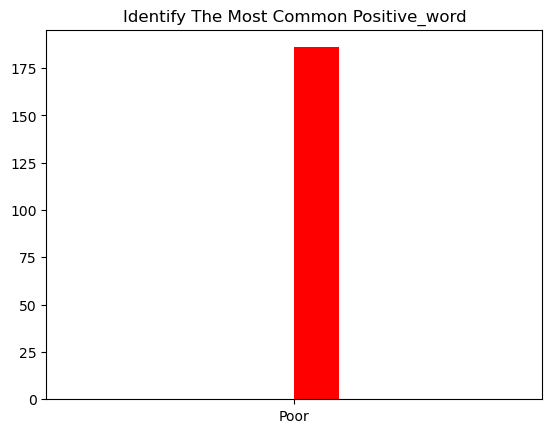

In [26]:
plt.hist(negative_data['Rating text'], color = 'red')
plt.title('Identify The Most Common Positive_word')
plt.show()

### Calculate the average length of rating and explore if there is a relationship between rating length and rating.


In [27]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [33]:
df['rating text lenght'] = df['Rating text'].apply(lambda x:len(x.split()))

In [35]:
average_lenth = df['rating text lenght'].mean()
print(average_lenth)

1.3378703800649148


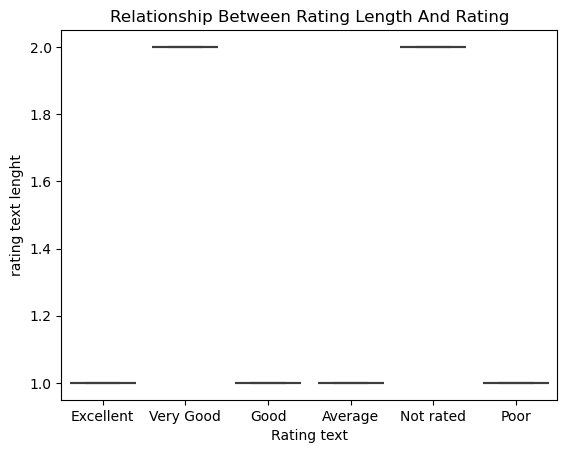

In [43]:
sns.boxplot(x= 'Rating text', y='rating text lenght', data = df)
plt.title('Relationship Between Rating Length And Rating')
plt.show()

### Task_2: Votes Analysis
### Identify the restaurants with the highest and lowest number of votes.


In [32]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [33]:
highest_votes = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending= False)

In [46]:
highest_votes =highest_votes.idxmax()

In [47]:
print('The Highest Votes Restaurants is :',highest_votes)

The Highest Votes Restaurants is : Barbeque Nation


In [39]:
lowest_votes =df.groupby('Restaurant Name')['Votes'].sum().sort_values()

In [44]:
lowest_Restaurant_votes = lowest_votes.idxmin()
print('The Lowest Votes Restaurants is :',lowest_Restaurant_votes)

The Lowest Votes Restaurants is : Laxmi Food Corner


### Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [204]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [205]:
correlation_1 = df['Votes'].corr(df['Aggregate rating'])
correlation_1 = np.round(correlation_1,2)
print(correlation_1)
                      

0.31


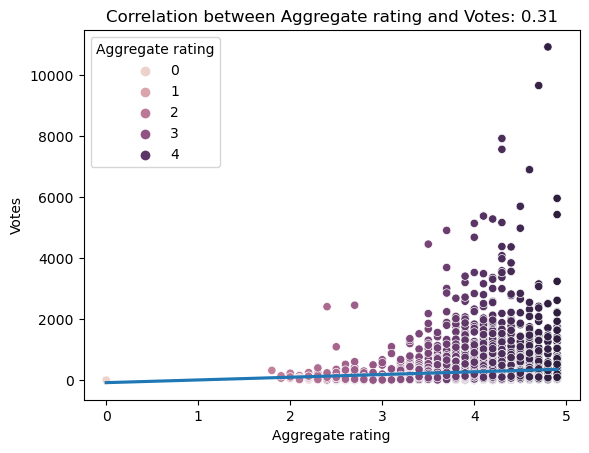

In [206]:
sns.scatterplot(data=df, y = 'Votes' , hue ='Aggregate rating', x = 'Aggregate rating')
sns.regplot(data=df, x='Aggregate rating', y= 'Votes', scatter=False) 
plt.title('Correlation between Aggregate rating and Votes: 0.31')
plt.show()

### Task_3: Price Range vs. Online Delivery and Table Booking
### Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [319]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [320]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [321]:
df['Has Table booking'] = df['Has Table booking'].map({'Yes':1, 'No':0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes':1, 'No':0})


In [322]:
price_range_analysis = df.groupby('Price range')[['Has Table booking','Has Online delivery']].mean()
price_range_analysis

,Has Table booking,Has Online delivery
Price range,,
1,0.000225,0.157741
2,0.076775,0.413106
3,0.457386,0.291903
4,0.467577,0.090444


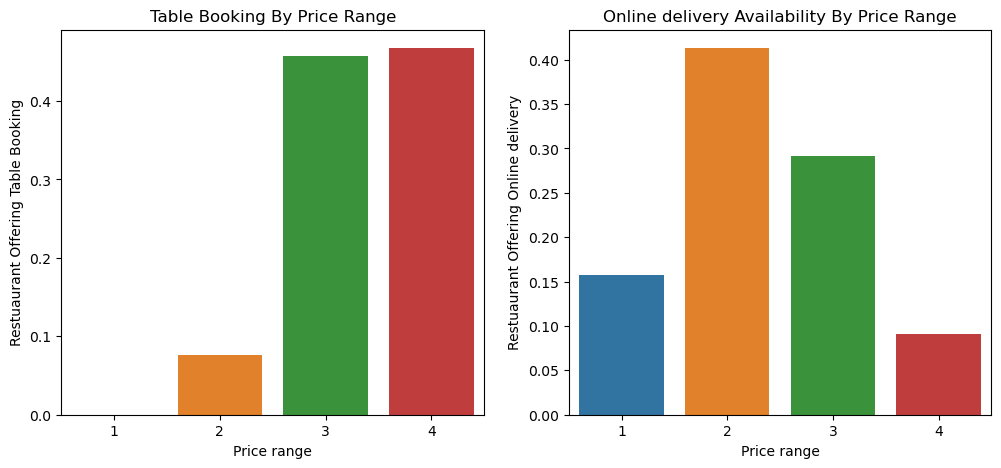

In [323]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

sns.barplot(x=price_range_analysis.index, y= price_range_analysis['Has Table booking'], ax= ax[0])
ax[0].set_title('Table Booking By Price Range')
ax[0].set_xlabel('Price range')
ax[0].set_ylabel('Restuaurant Offering Table Booking')

sns.barplot(x=price_range_analysis.index, y= price_range_analysis['Has Online delivery'], ax= ax[1])
ax[1].set_title('Online delivery Availability By Price Range')
ax[1].set_xlabel('Price range')
ax[1].set_ylabel('Restuaurant Offering Online delivery')


plt.show()

### Determine if higher-priced restaurants are more likely to offer these services

In [324]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [325]:
correlation = df[['Price range','Has Table booking','Has Online delivery']].corr()

In [326]:
correlation

,Price range,Has Table booking,Has Online delivery
Price range,1.000000,0.501925,0.077918
Has Table booking,0.501925,1.000000,0.101224
Has Online delivery,0.077918,0.101224,1.000000


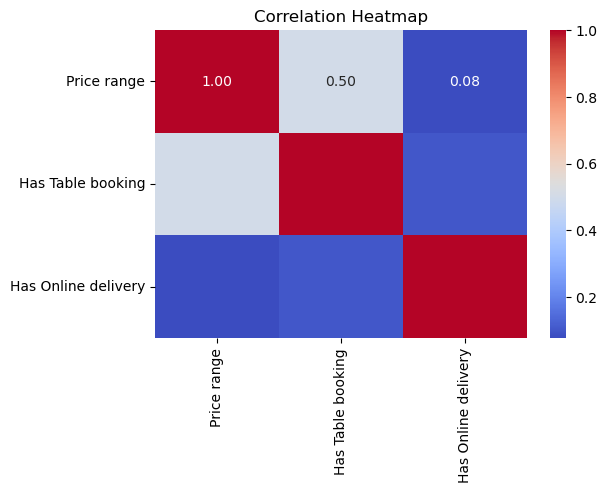

In [327]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()